In [1]:
import pandas as pd
df=pd.read_csv('train.csv.zip')

In [2]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
## get all the independent features
x=df.drop('label',axis=1)   #this will remove last column (label) 


In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
##get the dependent features
y=df['label']

In [7]:
y.head()#one side id number oyher side output of the data wether fake or not 1 for not fake 2 for fake

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer  

In [9]:
df=df.dropna()    #droping null values

In [10]:
df.shape  #shape decreade from 20800 to 18285

(18285, 5)

In [11]:
message=df.copy() #coping whole data frame to message

In [12]:
message.reset_index(inplace=True)#since when we drop the null value index the arrangment of index get disorder let say 3 data is missing so this helps to arrange index in the normal order by making 4th one to 3and so on

In [13]:
message.head(10)    ##we can see the id and new index values

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
message['title'][4]   #printing 4 th row  of title coluumn

'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery'

In [15]:
message['title'][1] 

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [16]:
### Now we will try to implement nlp on the data 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  #for stemming like history to histori other alternate we can use like lemmatization
import re
ps=PorterStemmer()
corpus=[]
for i in range (0,len(message)):
    review = re.sub('[^a-zA-Z]',' ',message['title'][i]) ##rev.sub() is substituting all character  other than atoz an AtoZ with blank
    review = review.lower()
    review = review.split() #because after this we will apply  stop keywards and stemming
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #doing stemming of words which are not in stop words 
    review = ' '.join(review)
    corpus.append(review)
    


In [17]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [18]:
X=corpus                            # X=pd.DataFrame(corpus)
                            # X

In [19]:
y=message['label']

In [20]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [21]:
y.shape

(18285,)

In [22]:
##divide the data into Train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [23]:
X_train

['neon ak young russian gun celebr halloween photo',
 'genet modifi crop u fail deliv expect yield',
 'iphon wireless headphon analyz appl announc new york time',
 'defens board white hous block navi china sea warship passag',
 'trump aid stephen miller u absolut sovereign right determin cannot enter countri breitbart',
 'vp mike penc korean demilitar zone era strateg patienc',
 'time run stop kratom ban need comment dea',
 'georg soro financ group scheme stop trump temporari refuge halt order breitbart',
 'guy fawk gun powder plot fals flag shape histori',
 'christi chief execut step hand rein guillaum cerutti new york time',
 'session strip billion sanctuari citi',
 'newstick',
 'effect fragranc product upon consum',
 'veep season episod affront new york time',
 'california today hollywood histori vs souvenir junk new york time',
 'dept homeland secur inspector gener treat leak select breitbart',
 'psychiatr patient south africa die neglig report find new york time',
 'california tod

In [24]:
y_train

8321     1
15615    1
7688     0
12330    1
345      0
        ..
9225     1
13123    1
9845     1
10799    0
2732     0
Name: label, Length: 12250, dtype: int64

In [25]:
y_test

13298    0
4816     0
5463     1
11612    0
7476     0
        ..
11811    1
2137     0
2730     0
14030    0
16813    1
Name: label, Length: 6035, dtype: int64

In [26]:
len(X_train)

12250

In [27]:
####X1=X_train.values.tolist() ### converting data frame X_train to list

In [28]:
X_test ##6053 33%of text size as given

['kelsey hark women striker ignor atroc muslim world',
 'fbi million gun background check new record',
 'bust clinton foundat directli tie plot steal elect',
 'mrc network cover session x eric holder held contempt congress breitbart',
 'trump ok daca amnesti case heart breitbart',
 'fed hike key interest rate signal econom strength breitbart',
 'north korean missil test bring temporari uniti east asia new york time',
 'migrant pitch tent pari street calai camp shut',
 'trump get electr chair cheat debat like hillari',
 'ing cut job',
 'fed hold rais rate fear rise dollar',
 'freedom rider obama hollow legaci',
 'leak script show advis want donald trump say black church new york time',
 'unit grappl pr crisi video man drag plane new york time',
 'paul lepag besieg main governor send conflict signal intent new york time',
 'trump drop fals birther theori float new one clinton start new york time',
 'art qur rare peek islam holi text new york time',
 'america stun mein trumpf storm white 

In [29]:
len(X_test)

6035

In [ ]:
### way to convert dataframe to list ------ X2=X_test.values.tolist()


# example to show how countvectorizer and ngram_range(1,3) works

In [ ]:
##corpus = [
...     'This is the first document.',
...     'This document is the second document.',
...     'And this is the third one.',
...     'Is this the first document?',
... ]
####vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
##X2 = vectorizer2.fit_transform(corpus)
##print(vectorizer2.get_feature_names())

In [ ]:
##landmarks[mp_pose.PoseLandmark.NOSE.value]) #four rows for for sentences  

In [30]:
##Applying Countvectorizer
#creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3)) ##making object cv, max_feature is taking most frequents words in the corpus list form to perform bag of words
X1=cv.fit_transform(X_train).toarray()
X2=cv.transform(X_test)


In [31]:
print(cv.get_feature_names())[:20]

['ab', 'abandon', 'abc', 'abc news', 'abduct', 'abedin', 'abl', 'abort', 'abroad', 'absolut', 'absurd', 'abus', 'abus new', 'abus new york', 'academi', 'accept', 'access', 'access pipelin', 'access pipelin protest', 'accident', 'accord', 'account', 'accus', 'accus trump', 'achiev', 'acknowledg', 'acknowledg emf', 'acknowledg emf damag', 'aclu', 'acosta', 'acquit', 'acquitt', 'across', 'act', 'act like', 'act new', 'act new york', 'action', 'activ', 'activ foreign', 'activ foreign agent', 'activist', 'actor', 'actual', 'ad', 'adam', 'add', 'addict', 'address', 'address breitbart', 'adhd', 'admin', 'administr', 'admir', 'admit', 'adopt', 'adult', 'advanc', 'advertis', 'advic', 'advis', 'advis new', 'advis new york', 'advisor', 'advoc', 'affair', 'affect', 'affili', 'affirm', 'afford', 'afford care', 'afford care act', 'afghan', 'afghanistan', 'afraid', 'africa', 'african', 'african american', 'ag', 'age', 'age new', 'age new york', 'agenc', 'agenda', 'agent', 'agent saudi', 'agent saudi 

TypeError: 'NoneType' object is not subscriptable

In [32]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
X1.shape

(12250, 5000)

In [34]:
X2

<6035x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 55619 stored elements in Compressed Sparse Row format>

In [35]:
count_df=pd.DataFrame(X1,columns=cv.get_feature_names())

In [36]:
count_df.head(10)

,ab,abandon,abc,abc news,abduct,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import matplotlib.pyplot as plt

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm

In [39]:
from sklearn.naive_bayes import MultinomialNB     ###for text data multinomiaNB works well and also support for multiple categories of output
classifier=MultinomialNB()

In [40]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.899
Confusion matrix, without normalization


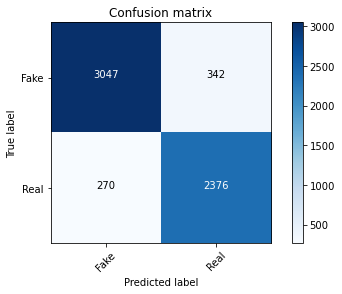

In [41]:
classifier.fit(X1,y_train)
pred=classifier.predict(X2)
score=metrics.accuracy_score( y_test,pred)
print("accuracy: %.3f" % score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake','Real'])

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)



accuracy:   0.920
Confusion matrix, without normalization


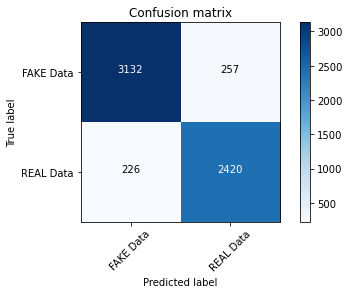

In [43]:
linear_clf.fit(X1, y_train)
pred = linear_clf.predict(X2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])